In [1]:
# ELO Merchant Category Recommendation - Exploratory Data Analysis (Train.csv)

In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from IPython.display import display

# Set the visualization style
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

# Define data path - adjust as needed
DATA_PATH = '../data/raw/'  # Add your path here if needed


In [3]:
# Cell 2: Load Train Data
print("\n=== Loading Training Data ===")
train = pd.read_csv(DATA_PATH + 'train.csv')
print(f"Train set shape: {train.shape}")


=== Loading Training Data ===
Train set shape: (201917, 6)


In [4]:
# Cell 3: Basic Training Data Overview
print("\n=== Training Data Overview ===")
print(train.head())
print("\nColumn information:")
print(train.info())



=== Training Data Overview ===
  first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749  

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   fea

In [5]:
# Cell 4: Statistical Summary
print("\nStatistical summary:")
print(train.describe())


Statistical summary:
           feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%         3.000000       2.000000       1.000000      -0.023437
75%         4.000000       2.000000       1.000000       0.765453
max         5.000000       3.000000       1.000000      17.965068


In [6]:
# Cell 5: Simple Missing Values Analysis
print("\nMissing values in train data:")
missing_values = train.isnull().sum()
missing_percentages = (missing_values / len(train) * 100).round(2)

# Create a DataFrame with both counts and percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})

# Only display columns that actually have missing values
missing_cols = missing_data[missing_data['Missing Values'] > 0]

if missing_cols.empty:
    print("No missing values found in any column.")
else:
    print(missing_cols)
    
    # Simple summary
    total_missing = missing_values.sum()
    print(f"\nTotal missing values: {total_missing}")


Missing values in train data:
No missing values found in any column.


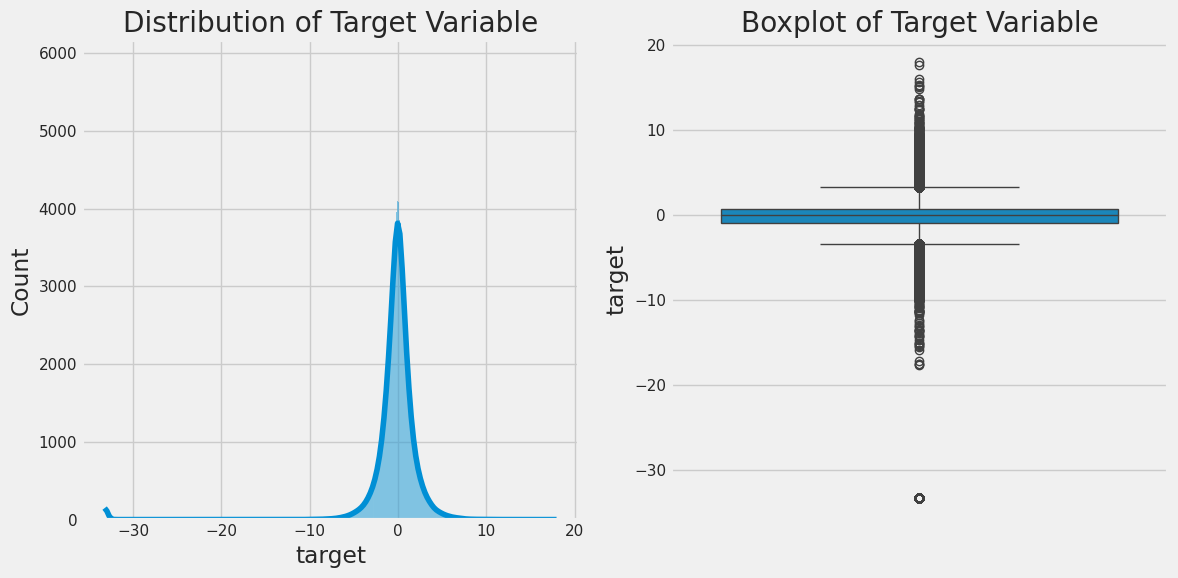

In [7]:
# Cell 6: Target Variable Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['target'], kde=True)
plt.title('Distribution of Target Variable')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['target'])
plt.title('Boxplot of Target Variable')
plt.tight_layout()
plt.show()

In [8]:
# Cell 7: Target Variable Statistics
target_stats = {
    'Mean': train['target'].mean(),
    'Median': train['target'].median(),
    'Min': train['target'].min(),
    'Max': train['target'].max(),
    'Std Dev': train['target'].std(),
    '25th Percentile': train['target'].quantile(0.25),
    '75th Percentile': train['target'].quantile(0.75)
}
print("Target Variable Statistics:")
for stat, value in target_stats.items():
    print(f"{stat}: {value:.4f}")


Target Variable Statistics:
Mean: -0.3936
Median: -0.0234
Min: -33.2193
Max: 17.9651
Std Dev: 3.8505
25th Percentile: -0.8831
75th Percentile: 0.7655



=== First Active Month Analysis ===


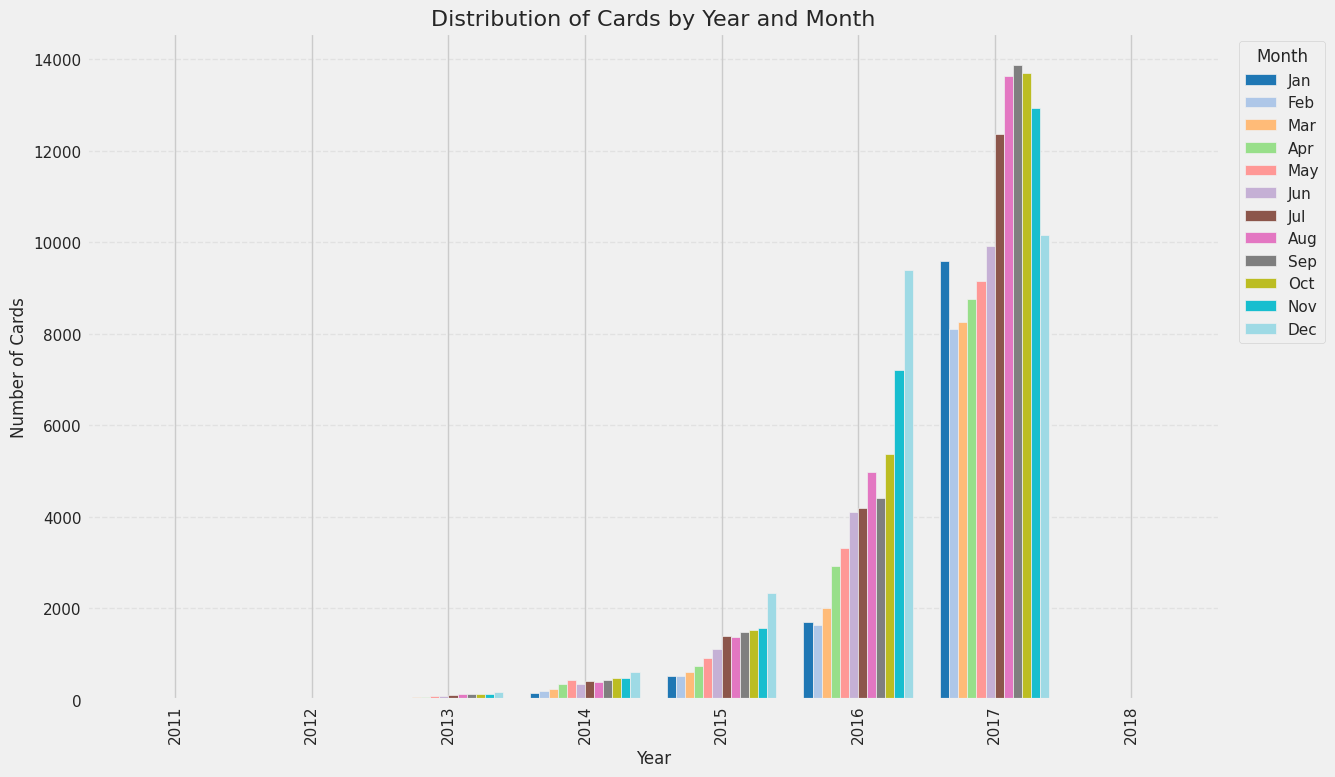


Card Distribution by Year and Month:
       Jan   Feb   Mar   Apr   May   Jun    Jul    Aug    Sep    Oct    Nov  \
year                                                                          
2011     0     0     0     0     0     0      0      0      0      0      8   
2012     0     7    10    18    28    19     29     36     38     31     48   
2013    23    37    58    58    94    79    110    126    121    126    132   
2014   144   198   242   352   431   345    407    399    431    476    481   
2015   533   526   608   733   918  1104   1393   1376   1494   1532   1582   
2016  1711  1636  2005  2938  3314  4102   4188   4977   4410   5371   7222   
2017  9605  8110  8271  8761  9168  9930  12363  13638  13878  13695  12930   
2018    34     1     0     0     0     0      0      0      0      0      0   

        Dec  
year         
2011      2  
2012     18  
2013    165  
2014    617  
2015   2343  
2016   9403  
2017  10170  
2018      0  


In [9]:
# Cell 8: First Active Month Analysis (Pandas Plot)
if 'first_active_month' in train.columns:
    # Convert to datetime
    train['first_active_month'] = pd.to_datetime(train['first_active_month'])
    
    print("\n=== First Active Month Analysis ===")
    
    # Extract year and month
    train['year'] = train['first_active_month'].dt.year
    train['month'] = train['first_active_month'].dt.month
    
    # Create a pivot table to count cards by year and month
    year_month_counts = pd.crosstab(
        index=train['year'],
        columns=train['month']
    )
    
    # Rename columns to month names
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    year_month_counts.columns = [month_names[i-1] for i in year_month_counts.columns]
    
    # Plot using pandas built-in plotting
    ax = year_month_counts.plot(
        kind='bar', 
        figsize=(16, 8),
        width=0.8,
        colormap='tab20'
    )
    
    # Enhance the plot
    plt.title('Distribution of Cards by Year and Month', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Cards', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.legend(title="Month", bbox_to_anchor=(1.01, 1), loc='upper left')
    
    # Optional: Add value labels on top of bars for better readability
    # Uncomment if you want to see actual numbers on bars
    # for container in ax.containers:
    #     ax.bar_label(container, rotation=90, fontsize=8, padding=3)
    
    # Add some space on the right for the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    plt.show()
    
    # Display the counts in table format
    print("\nCard Distribution by Year and Month:")
    print(year_month_counts)


=== Feature 1 Analysis with Violin Plot ===
feature_1 Value Counts:
feature_1
1    12037
2    55797
3    73573
4    19885
5    40625
Name: count, dtype: int64

feature_1 Percentage Distribution:
feature_1
1     5.96
2    27.63
3    36.44
4     9.85
5    20.12
Name: count, dtype: float64


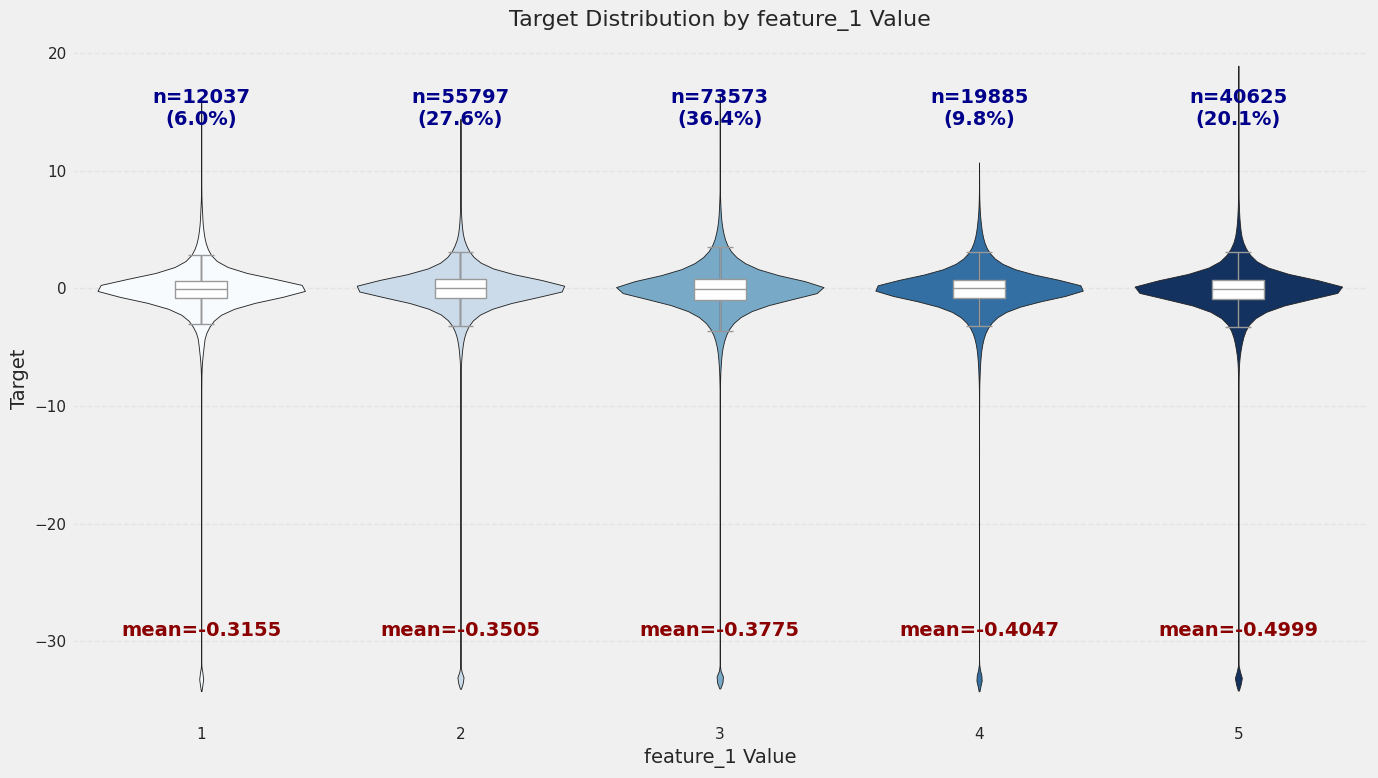


feature_1 Summary Statistics:
           Count  Percentage (%)      Mean    Median   Std Dev        Min  \
feature_1                                                                   
1          12037            5.96 -0.315476 -0.011003  3.407106 -33.219281   
2          55797           27.63 -0.350452  0.000000  3.756032 -33.219281   
3          73573           36.44 -0.377533 -0.036539  3.834499 -33.219281   
4          19885            9.85 -0.404652  0.000000  3.817954 -33.219281   
5          40625           20.12 -0.499879 -0.056208  4.134833 -33.219281   

                 Max  
feature_1             
1          15.011358  
2          13.592223  
3          15.606405  
4           9.665204  
5          17.965068  


In [20]:
# Cell 9: Feature 1 Analysis with Violin Plot
print("\n=== Feature 1 Analysis with Violin Plot ===")

if 'feature_1' in train.columns and 'target' in train.columns:
    # Get value counts and sort by index
    value_counts = train['feature_1'].value_counts().sort_index()
    
    # Display value counts and percentages
    print("feature_1 Value Counts:")
    print(value_counts)
    
    value_percentages = (value_counts / len(train) * 100).round(2)
    print("\nfeature_1 Percentage Distribution:")
    print(value_percentages)
    
    # Check for missing values
    missing_count = train['feature_1'].isnull().sum()
    if missing_count > 0:
        missing_percent = (missing_count / len(train) * 100).round(2)
        print(f"\nMissing values: {missing_count} ({missing_percent}%)")
    
    # Create violin plot for target distribution by feature value
    plt.figure(figsize=(14, 8))
    
    # Create violin plot
    sns.violinplot(x='feature_1', y='target', data=train, hue='feature_1', palette='Blues', legend=False)    
    # Add a strip plot for individual points (optional, can comment out if too cluttered)
    #sns.stripplot(x='feature_1', y='target', data=train.sample(min(5000, len(train))), 
    #           size=2, color='black', alpha=0.3)
    
    # Add a box plot inside the violin to show median, quartiles
    sns.boxplot(x='feature_1', y='target', data=train, 
                width=0.2, color='white', showfliers=False)
    
    # Add count annotations above each violin
    for i, category in enumerate(sorted(train['feature_1'].unique())):
        count = len(train[train['feature_1'] == category])
        plt.text(i, train['target'].max() * 0.95, 
                f'n={count}\n({count/len(train)*100:.1f}%)', 
                ha='center', va='top', fontweight='bold', color='darkblue')
    
    # Add mean target values below each violin
    for i, category in enumerate(sorted(train['feature_1'].unique())):
        mean_val = train[train['feature_1'] == category]['target'].mean()
        plt.text(i, train['target'].min() * 0.9, 
                f'mean={mean_val:.4f}', 
                ha='center', va='bottom', fontweight='bold', color='darkred')
    
    plt.title('Target Distribution by feature_1 Value', fontsize=16)
    plt.xlabel('feature_1 Value', fontsize=14)
    plt.ylabel('Target', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate and display summary statistics
    feature_summary = train.groupby('feature_1')['target'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    feature_summary['percentage'] = (feature_summary['count'] / len(train) * 100).round(2)
    feature_summary = feature_summary[['count', 'percentage', 'mean', 'median', 'std', 'min', 'max']]
    feature_summary.columns = ['Count', 'Percentage (%)', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
    
    print("\nfeature_1 Summary Statistics:")
    print(feature_summary)
    
else:
    if 'feature_1' not in train.columns:
        print("feature_1 not found in the dataset.")
    else:
        print("target variable not found in the dataset.")


=== Feature 2 Analysis with Violin Plot ===
feature_2 Value Counts:
feature_2
1    89242
2    74839
3    37836
Name: count, dtype: int64

feature_2 Percentage Distribution:
feature_2
1    44.20
2    37.06
3    18.74
Name: count, dtype: float64


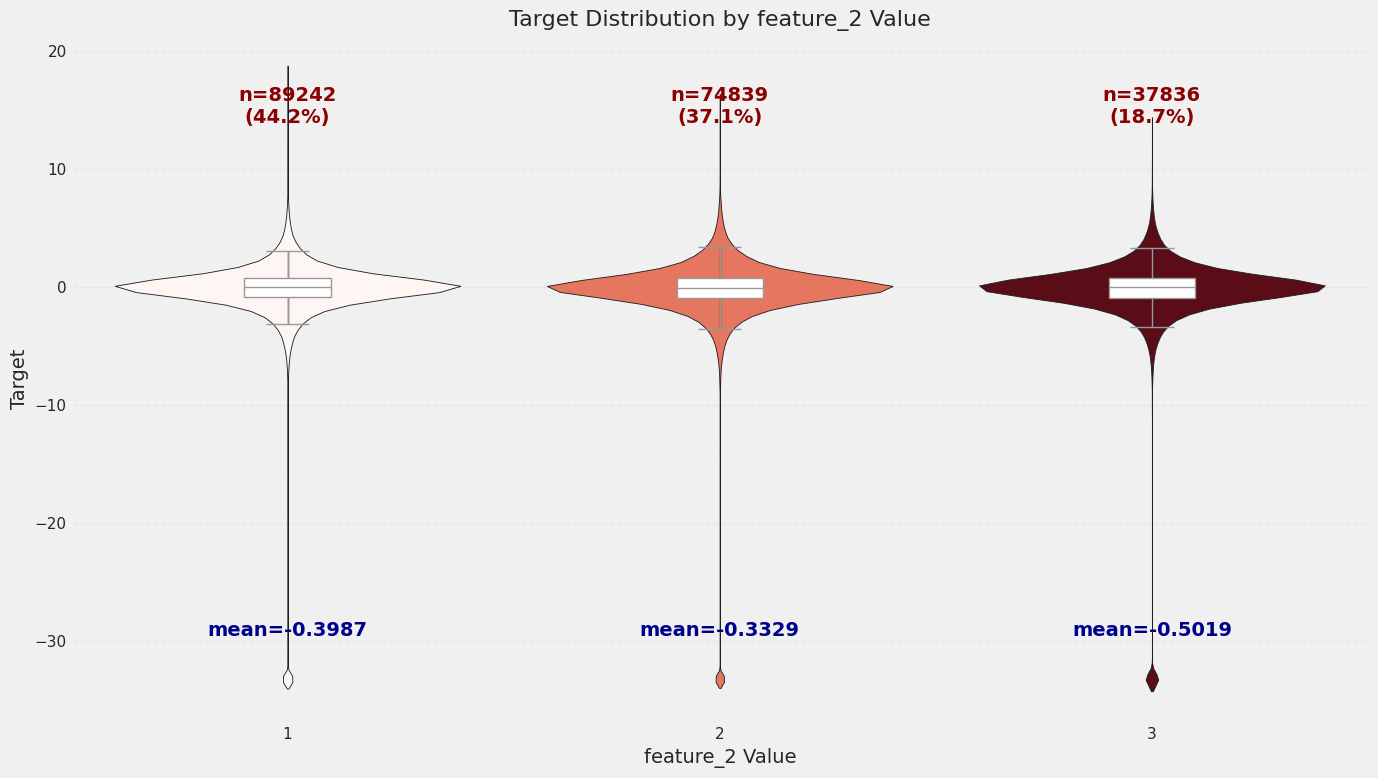


feature_2 Summary Statistics:
           Count  Percentage (%)      Mean    Median   Std Dev        Min  \
feature_2                                                                   
1          89242           44.20 -0.398675 -0.002394  3.890548 -33.219281   
2          74839           37.06 -0.332899 -0.045086  3.567683 -33.219281   
3          37836           18.74 -0.501889 -0.033784  4.269270 -33.219281   

                 Max  
feature_2             
1          17.965068  
2          15.606405  
3          13.350895  


In [21]:
# Cell 10: Feature 2 Analysis with Violin Plot
print("\n=== Feature 2 Analysis with Violin Plot ===")

if 'feature_2' in train.columns and 'target' in train.columns:
    # Get value counts and sort by index
    value_counts = train['feature_2'].value_counts().sort_index()
    
    # Display value counts and percentages
    print("feature_2 Value Counts:")
    print(value_counts)
    
    value_percentages = (value_counts / len(train) * 100).round(2)
    print("\nfeature_2 Percentage Distribution:")
    print(value_percentages)
    
    # Check for missing values
    missing_count = train['feature_2'].isnull().sum()
    if missing_count > 0:
        missing_percent = (missing_count / len(train) * 100).round(2)
        print(f"\nMissing values: {missing_count} ({missing_percent}%)")
    
    # Create violin plot for target distribution by feature value
    plt.figure(figsize=(14, 8))
    
    # Create violin plot
    sns.violinplot(x='feature_2', y='target', data=train, hue='feature_2', palette='Reds', legend=False)    
    # Add a box plot inside the violin to show median, quartiles
    sns.boxplot(x='feature_2', y='target', data=train, 
                width=0.2, color='white', showfliers=False)
    
    # Add count annotations above each violin
    for i, category in enumerate(sorted(train['feature_2'].unique())):
        count = len(train[train['feature_2'] == category])
        plt.text(i, train['target'].max() * 0.95, 
                f'n={count}\n({count/len(train)*100:.1f}%)', 
                ha='center', va='top', fontweight='bold', color='darkred')
    
    # Add mean target values below each violin
    for i, category in enumerate(sorted(train['feature_2'].unique())):
        mean_val = train[train['feature_2'] == category]['target'].mean()
        plt.text(i, train['target'].min() * 0.9, 
                f'mean={mean_val:.4f}', 
                ha='center', va='bottom', fontweight='bold', color='darkblue')
    
    plt.title('Target Distribution by feature_2 Value', fontsize=16)
    plt.xlabel('feature_2 Value', fontsize=14)
    plt.ylabel('Target', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate and display summary statistics
    feature_summary = train.groupby('feature_2')['target'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    feature_summary['percentage'] = (feature_summary['count'] / len(train) * 100).round(2)
    feature_summary = feature_summary[['count', 'percentage', 'mean', 'median', 'std', 'min', 'max']]
    feature_summary.columns = ['Count', 'Percentage (%)', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
    
    print("\nfeature_2 Summary Statistics:")
    print(feature_summary)
    
else:
    if 'feature_2' not in train.columns:
        print("feature_2 not found in the dataset.")
    else:
        print("target variable not found in the dataset.")


=== Feature 3 Analysis with Violin Plot ===
feature_3 Value Counts:
feature_3
0     87719
1    114198
Name: count, dtype: int64

feature_3 Percentage Distribution:
feature_3
0    43.44
1    56.56
Name: count, dtype: float64


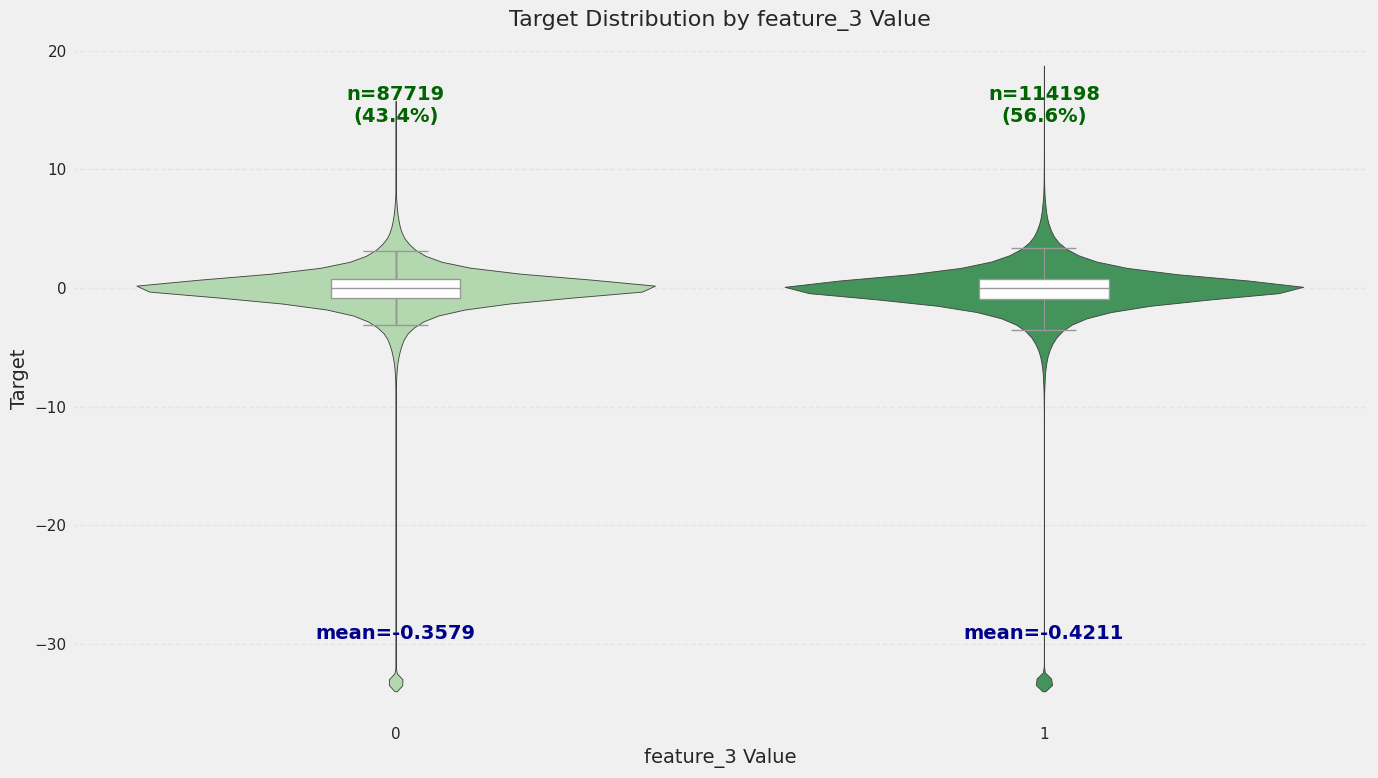


feature_3 Summary Statistics:
            Count  Percentage (%)      Mean    Median   Std Dev        Min  \
feature_3                                                                    
0           87719           43.44 -0.357939  0.000000  3.724459 -33.219281   
1          114198           56.56 -0.421057 -0.044637  3.944379 -33.219281   

                 Max  
feature_3             
0          15.011358  
1          17.965068  


In [22]:
# Cell 11: Feature 3 Analysis with Violin Plot
print("\n=== Feature 3 Analysis with Violin Plot ===")

if 'feature_3' in train.columns and 'target' in train.columns:
    # Get value counts and sort by index
    value_counts = train['feature_3'].value_counts().sort_index()
    
    # Display value counts and percentages
    print("feature_3 Value Counts:")
    print(value_counts)
    
    value_percentages = (value_counts / len(train) * 100).round(2)
    print("\nfeature_3 Percentage Distribution:")
    print(value_percentages)
    
    # Check for missing values
    missing_count = train['feature_3'].isnull().sum()
    if missing_count > 0:
        missing_percent = (missing_count / len(train) * 100).round(2)
        print(f"\nMissing values: {missing_count} ({missing_percent}%)")
    
    # Create violin plot for target distribution by feature value
    plt.figure(figsize=(14, 8))
    
    # Create violin plot
    sns.violinplot(x='feature_3', y='target', data=train, hue='feature_3', palette='Greens', legend=False)    
    # Add a box plot inside the violin to show median, quartiles
    sns.boxplot(x='feature_3', y='target', data=train, 
                width=0.2, color='white', showfliers=False)
    
    # Add count annotations above each violin
    for i, category in enumerate(sorted(train['feature_3'].unique())):
        count = len(train[train['feature_3'] == category])
        plt.text(i, train['target'].max() * 0.95, 
                f'n={count}\n({count/len(train)*100:.1f}%)', 
                ha='center', va='top', fontweight='bold', color='darkgreen')
    
    # Add mean target values below each violin
    for i, category in enumerate(sorted(train['feature_3'].unique())):
        mean_val = train[train['feature_3'] == category]['target'].mean()
        plt.text(i, train['target'].min() * 0.9, 
                f'mean={mean_val:.4f}', 
                ha='center', va='bottom', fontweight='bold', color='darkblue')
    
    plt.title('Target Distribution by feature_3 Value', fontsize=16)
    plt.xlabel('feature_3 Value', fontsize=14)
    plt.ylabel('Target', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate and display summary statistics
    feature_summary = train.groupby('feature_3')['target'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    feature_summary['percentage'] = (feature_summary['count'] / len(train) * 100).round(2)
    feature_summary = feature_summary[['count', 'percentage', 'mean', 'median', 'std', 'min', 'max']]
    feature_summary.columns = ['Count', 'Percentage (%)', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
    
    print("\nfeature_3 Summary Statistics:")
    print(feature_summary)
    
else:
    if 'feature_3' not in train.columns:
        print("feature_3 not found in the dataset.")
    else:
        print("target variable not found in the dataset.")